In [1]:
import numpy as np
y_axis_labels =['LC','PRF','CNF','PPN',
             'SNr','STN','GPi','GPe',
             'Str','Ctx','SNc','Th']

d_h = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
    [0, -1, -1, -1, 0, 0, 0, 0, -1, 0, -1, -1],
    [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1],
    [0, -1, 0, -1, -1, -1, 0, -1, -1, 0, -1, -1],
    [0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0],
    [0, 0, 0, 0, -1, 0, -1, -1, -1, 0, -1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, -1, 1, -1, -1, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]])

d_pd = np.array([
    [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
    [ 1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
    [ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
    [ 0., -1., -1., -1.,  0.,  0.,  0.,  0., -1.,  0., -1., -1.],
    [ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
    [ 0., -1.,  0., -1., -1., -1.,  0., -1., -1.,  0., -1., -1.],
    [ 0.,  0.,  0.,  0., -1., -1., -1., -1., -1., -1., -1.,  0.],
    [ 0.,  0.,  0.,  0., -1.,  0., -1., -1., -1.,  0., -1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
    [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.]])

#np.fill_diagonal(d_h, 0)
#np.fill_diagonal(d_pd, 0)

# solve_ivp vs odeint

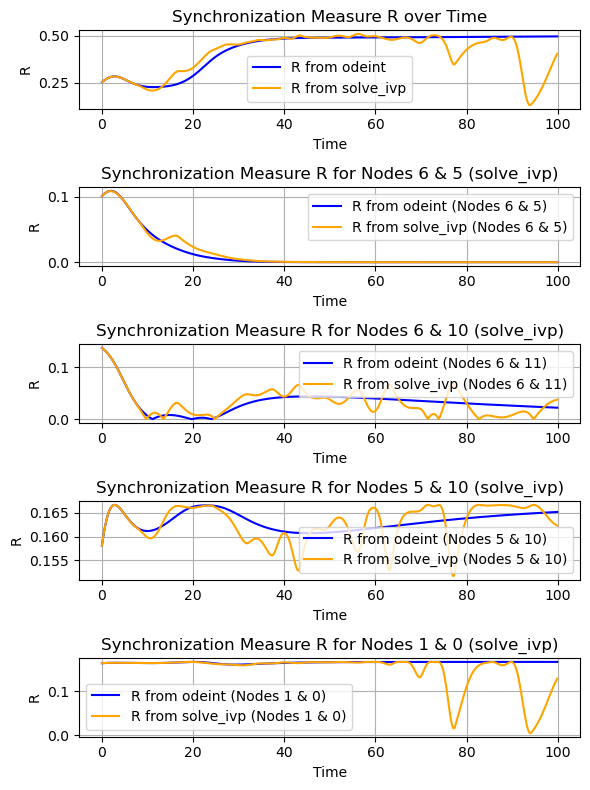

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import odeint, solve_ivp  

# Example coupling matrix (make sure this is defined appropriately)  
mat = d_pd

# Parameters  
frequency=2
N = 12  # Number of oscillators  
K = 1  # Coupling strength  
omega = frequency * np.ones(N)  # Natural frequencies  
final_time = 100  # Set final time to 100 units  
dt_int = 0.1      # Time step of 0.1  

# Initial phases  
#theta0 = np.array([2.70942126, 5.76723804, 5.37847039, 3.05959892, 6.02776251,  
#                   2.09733245, 5.08761267, 0.90470648, 3.80863463, 4.4018627,  
#                   4.37170568, 4.3379831])  
theta0 = np.random.uniform(0, 2 * np.pi, N)

# Define the Kuramoto model for odeint  
def kuramoto_ode(theta, t, N, K, omega):  
    dtheta_dt = np.zeros(N)  
    for i in range(N):  
        dtheta_dt[i] = omega[i] + (K / N) * np.sum(mat[i] * np.sin(theta - theta[i]))  
    return dtheta_dt  
# Define the Kuramoto model for odeint  
# def kuramoto_ode(theta, t,N, K, omega):  
#    dtheta_dt = omega + (K / N) * np.sum(mat * np.sin(theta[:, np.newaxis] - theta), axis=1)  
#    return dtheta_dt 
    
#Define the Kuramoto model for solve_ivp  
def kuramoto(t, theta):
    dtheta_dt = np.zeros(N)
    for i in range(N):
        dtheta_dt[i] = omega[i] + (K / N) * np.sum(mat[i] * np.sin(theta - theta[i]))
    return dtheta_dt  
# Kuramoto dynamics  
#def kuramoto(t, theta):  
#    dtheta_dt = omega + (K / N) * np.sum(mat * np.sin(theta[:, np.newaxis] - theta), axis=1)  
#    return dtheta_dt  
    
# Time array for integration  
t = np.arange(0, final_time, dt_int)  

result_odeint=[]
# Solve using odeint  
result_odeint = odeint(kuramoto_ode, theta0, t, args=(N, K, omega))  

result_solve_ivp=[]
# Solve using solve_ivp  
result_solve_ivp = solve_ivp(kuramoto, [0, final_time], theta0, t_eval=t)  

# Wrap phases to [-pi, pi]
result_odeint = (result_odeint + np.pi) % (2 * np.pi) - np.pi  
result_solve_ivp.y = (result_solve_ivp.y + np.pi) % (2 * np.pi) - np.pi  

# Calculate synchronization measure R  
def calculate_R(theta):  
    # R is given by R = |(1/N) * sum(exp(i * theta))|  
    complex_order_parameter = np.sum(np.exp(1j * theta)) / N  
    R = np.abs(complex_order_parameter)  
    return R
    
R_odeint_all=[]
R_solve_ivp_all=[]
# Calculate R for both solutions  
R_odeint_all = np.array([calculate_R(result_odeint[i]) for i in range(result_odeint.shape[0])])  
R_solve_ivp_all = np.array([calculate_R(result_solve_ivp.y[:, i]) for i in range(result_solve_ivp.y.shape[1])])  

R_odeint_65=[]
R_solve_ivp_65=[]
# Calculate R for nodes 6 and 7 (indices 5 and 6)  
R_odeint_65 = np.array([calculate_R(result_odeint[i, [6, 5]]) for i in range(result_odeint.shape[0])])  
R_solve_ivp_65 = np.array([calculate_R(result_solve_ivp.y[[6, 5], i]) for i in range(result_solve_ivp.y.shape[1])])  

R_odeint_610=[]
R_solve_ivp_610=[]
# Calculate R for nodes 6 and 7 (indices 5 and 6)  
R_odeint_610 = np.array([calculate_R(result_odeint[i, [6, 10]]) for i in range(result_odeint.shape[0])])  
R_solve_ivp_610 = np.array([calculate_R(result_solve_ivp.y[[6, 10], i]) for i in range(result_solve_ivp.y.shape[1])])  

R_odeint_510=[]
R_solve_ivp_510=[]
# Calculate R for nodes 6 and 7 (indices 5 and 6)  
R_odeint_510 = np.array([calculate_R(result_odeint[i, [5, 10]]) for i in range(result_odeint.shape[0])])  
R_solve_ivp_510 = np.array([calculate_R(result_solve_ivp.y[[5, 10], i]) for i in range(result_solve_ivp.y.shape[1])])  

R_odeint_10=[]
R_solve_ivp_10=[]
# Calculate R for nodes 6 and 7 (indices 5 and 6)  
R_odeint_10 = np.array([calculate_R(result_odeint[i, [1, 0]]) for i in range(result_odeint.shape[0])])  
R_solve_ivp_10 = np.array([calculate_R(result_solve_ivp.y[[1, 0], i]) for i in range(result_solve_ivp.y.shape[1])])  

# Plotting the results  
subplot_size=5
plt.figure(figsize=(6, 8))
plt.subplot(subplot_size, 1, 1)
plt.plot(t, R_odeint_all, label='R from odeint', color='blue')  
plt.plot(t, R_solve_ivp_all, label='R from solve_ivp', color='orange')  # Corrected line  
plt.title('Synchronization Measure R over Time')  
plt.xlabel('Time')  
plt.ylabel('R')  
plt.legend()  
plt.grid()  
# plt.ylim(0, 1)  # R ranges from 0 to 1  

plt.subplot(subplot_size, 1, 2)
plt.plot(t, R_odeint_65, label='R from odeint (Nodes 6 & 5)', color='blue')  
plt.plot(t, R_solve_ivp_65, label='R from solve_ivp (Nodes 6 & 5)', color='orange')  
plt.title('Synchronization Measure R for Nodes 6 & 5 (solve_ivp)')  
plt.xlabel('Time')  
plt.ylabel('R')  
plt.legend()  
plt.grid()  
# plt.ylim(0, 1)  # R ranges from 0 to 1

plt.subplot(subplot_size, 1, 3)
plt.plot(t, R_odeint_610, label='R from odeint (Nodes 6 & 11)', color='blue')  
plt.plot(t, R_solve_ivp_610, label='R from solve_ivp (Nodes 6 & 11)', color='orange')  
plt.title('Synchronization Measure R for Nodes 6 & 10 (solve_ivp)')  
plt.xlabel('Time')  
plt.ylabel('R')  
plt.legend()  
plt.grid()  
# plt.ylim(0, 1)  # R ranges from 0 to 1

plt.subplot(subplot_size, 1, 4)
plt.plot(t, R_odeint_510, label='R from odeint (Nodes 5 & 10)', color='blue')  
plt.plot(t, R_solve_ivp_510, label='R from solve_ivp (Nodes 5 & 10)', color='orange')  
plt.title('Synchronization Measure R for Nodes 5 & 10 (solve_ivp)')  
plt.xlabel('Time')  
plt.ylabel('R')  
plt.legend()  
plt.grid()  
# plt.ylim(0, 1)  # R ranges from 0 to 1

plt.subplot(subplot_size, 1, 5)
plt.plot(t, R_odeint_10, label='R from odeint (Nodes 1 & 0)', color='blue')  
plt.plot(t, R_solve_ivp_10, label='R from solve_ivp (Nodes 1 & 0)', color='orange')  
plt.title('Synchronization Measure R for Nodes 1 & 0 (solve_ivp)')  
plt.xlabel('Time')  
plt.ylabel('R')  
plt.legend()  
plt.grid()  
# plt.ylim(0, 1)  # R ranges from 0 to 1

plt.tight_layout()

# check different initial conditions

In [2]:
theta0= np.array([2.97965144, 2.88041689, 5.31820391, 1.47234643, 3.47313868,
       0.78454326, 3.70524275, 2.65256775, 0.16683834, 3.66548892,
       5.46139337, 5.75232834])

# np.array([1.13878832, 4.6177762 , 1.05511027, 6.27171308, 2.76710296,
#        0.35217278, 3.80883946, 1.16508376, 3.82968581, 5.30474866,
#        3.11110129, 4.21951334])

In [ ]:
change solver to odeint

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

mat_h= d_h
mat_pd= d_pd
# Parameters
final_time= 100
N = 12  # Number of oscillators
K = 1   # Coupling strength
f= 1
omega = f * np.ones(N)  # Natural frequencies
dt_int = 0.1      # Time step of 0.1  
# Time array for integration  
t = np.arange(0, final_time, dt_int)  
samples=1000
# Initial random phases
#theta0 = np.random.uniform(0, 2 * np.pi, N)

# Define the Kuramoto model for odeint  
def kuramoto_ode(theta, t, N, K, omega):  
    dtheta_dt = np.zeros(N)  
    for i in range(N):  
        dtheta_dt[i] = omega[i] + (K / N) * np.sum(mat_pd[i] * np.sin(theta - theta[i]))  
    return dtheta_dt
# Define the Kuramoto model for odeint  
def kuramoto_ode_h(theta, t, N, K, omega):  
    dtheta_dt = np.zeros(N)  
    for i in range(N):  
        dtheta_dt[i] = omega[i] + (K / N) * np.sum(mat_h[i] * np.sin(theta - theta[i]))  
    return dtheta_dt
    
##Define the Kuramoto model for solve_ivp  
def kuramoto(t, theta):
    dtheta_dt = np.zeros(N)
    for i in range(N):
        dtheta_dt[i] = omega[i] + (K / N) * np.sum(mat_pd[i] * np.sin(theta - theta[i]))
    return dtheta_dt  
##Define the Kuramoto model for solve_ivp  
def kuramoto_healthy(t, theta):
    dtheta_dt_h = np.zeros(N)
    for i in range(N):
        dtheta_dt_h[i] = omega[i] + (K / N) * np.sum(mat_h[i] * np.sin(theta - theta[i]))
    return dtheta_dt_h  

result_solve_ivp_h=[]
result_solve_ivp_pd=[]


# Solve using odeint  
result_solve_ivp_h = odeint(kuramoto_ode_h, theta0, t, args=(N, K, omega))  
sol_h.y= result_solve_ivp_h
result_solve_ivp_pd =  odeint(kuramoto_ode, theta0, t, args=(N, K, omega)) 
sol.y= result_solve_ivp_pd

## Solve using solve_ivp  
#result_solve_ivp_h = solve_ivp(kuramoto_healthy, [0, final_time], theta0, t_eval=t)  
#sol_h= result_solve_ivp_h

## Solve using solve_ivp  
#result_solve_ivp_pd = solve_ivp(kuramoto, [0, final_time], theta0, t_eval=t)  
#sol= result_solve_ivp_pd

## Kuramoto dynamics
#def kuramoto(t, theta):
#    dtheta_dt = omega + (K / N) * np.sum(mat *np.sin(theta[:, np.newaxis] - theta), axis=1)
#    return dtheta_dt
#sol=[]
## Solve the system
#sol = solve_ivp(kuramoto, [0, final_time], theta0, t_eval=np.linspace(0, final_time, samples))

# Wrap phases to [-pi, pi] range
for i in range(N):
    sol_h.y[i] = np.mod(sol_h.y[i], 2 * np.pi) - np.pi
# Wrap phases to [-pi, pi] range
for i in range(N):
    sol.y[i] = np.mod(sol.y[i], 2 * np.pi) - np.pi

def wrap_phase(phase):
    wrapped = (phase+ np.pi) % (2 * np.pi) - np.pi
    return wrapped
##############################################################   PD ####################
# Compute phase differences 5,6,10
delta_theta_65 = sol.y[6] - sol.y[5]
delta_theta_510 = sol.y[10] - sol.y[5]
delta_theta_610 = sol.y[10] - sol.y[6]
# Compute phase differences 4,5,10
delta_theta_45 = sol.y[4] - sol.y[5]
delta_theta_510 = sol.y[10] - sol.y[5]
delta_theta_410 = sol.y[10] - sol.y[4]

# Compute phase differences 5,6,10
delta_theta_65 = wrap_phase(delta_theta_65)
delta_theta_510 = wrap_phase(delta_theta_510)
delta_theta_610 = wrap_phase(delta_theta_610)
# Compute phase differences 4,5,10
delta_theta_45 = wrap_phase(delta_theta_45)
delta_theta_510 = wrap_phase(delta_theta_510)
delta_theta_410 = wrap_phase(delta_theta_410)
    
# Synchronization measure R : 5,6,10
R56 = np.abs(np.mean(np.exp(1j * sol.y[[5, 6], :]), axis=0))
R510 = np.abs(np.mean(np.exp(1j * sol.y[[5, 10], :]), axis=0))
R610 = np.abs(np.mean(np.exp(1j * sol.y[[6, 10], :]), axis=0))
# Synchronization measure R : 4,5,10
R45 = np.abs(np.mean(np.exp(1j * sol.y[[4, 5], :]), axis=0))
R410 = np.abs(np.mean(np.exp(1j * sol.y[[4, 10], :]), axis=0))
R510 = np.abs(np.mean(np.exp(1j * sol.y[[5, 10], :]), axis=0))

###################################################################### Healthy  #############
# Compute phase differences 5,6,10
delta_theta_65_h = sol_h.y[6] - sol_h.y[5]
delta_theta_510_h = sol_h.y[10] - sol_h.y[5]
delta_theta_610_h = sol_h.y[10] - sol_h.y[6]
# Compute phase differences 4,5,10
delta_theta_45_h = sol_h.y[4] - sol_h.y[5]
delta_theta_510_h = sol_h.y[10] - sol_h.y[5]
delta_theta_410_h = sol_h.y[10] - sol_h.y[4]

# Compute phase differences 5,6,10
delta_theta_65_h = wrap_phase(delta_theta_65_h)
delta_theta_510_h = wrap_phase(delta_theta_510_h)
delta_theta_610_h = wrap_phase(delta_theta_610_h)
# Compute phase differences 4,5,10
delta_theta_45_h = wrap_phase(delta_theta_45_h)
delta_theta_510_h = wrap_phase(delta_theta_510_h)
delta_theta_410_h = wrap_phase(delta_theta_410_h)
    
# Synchronization measure R : 5,6,10
R56_h = np.abs(np.mean(np.exp(1j * sol_h.y[[5, 6], :]), axis=0))
R510_h = np.abs(np.mean(np.exp(1j * sol_h.y[[5, 10], :]), axis=0))
R610_h = np.abs(np.mean(np.exp(1j * sol_h.y[[6, 10], :]), axis=0))
# Synchronization measure R : 4,5,10
R45_h = np.abs(np.mean(np.exp(1j * sol_h.y[[4, 5], :]), axis=0))
R410_h = np.abs(np.mean(np.exp(1j * sol_h.y[[4, 10], :]), axis=0))
R510_h = np.abs(np.mean(np.exp(1j * sol_h.y[[5, 10], :]), axis=0))

 

m=4
n=2
# Plot results
#######################################    PD ##########################
plt.figure(figsize=(10, 6))
plt.subplot(m, n, 1)
plt.plot(sol.t, delta_theta_65, label='diff 6,5')
plt.plot(sol.t, delta_theta_510, label='diff 5,10')
plt.plot(sol.t, delta_theta_610, label='diff 6,10')
plt.xlabel('Time')
plt.ylabel('Phase Difference')
plt.title('PD')
plt.legend()

plt.subplot(m, n, 3)
plt.plot(sol.t, R56, label='R56')
plt.plot(sol.t, R510, label='R510')
plt.plot(sol.t, R610, label='R610')
plt.xlabel('Time')
plt.ylabel('synch Measu')
plt.legend()

plt.subplot(m, n, 5)
plt.plot(sol.t, delta_theta_45, label='delta_theta_45')
plt.plot(sol.t, delta_theta_510, label='delta_theta_510')
plt.plot(sol.t, delta_theta_410, label='delta_theta_410')
plt.xlabel('Time')
plt.ylabel('Phase Difference')
plt.legend()

plt.subplot(m, n, 7)
plt.plot(sol.t, R45, label='R45')
plt.plot(sol.t, R510, label='R510')
plt.plot(sol.t, R410, label='R410')
plt.xlabel('Time')
plt.ylabel('synch Meas')
plt.legend()
############################################################################

########################################### Healthy #################################
ax= plt.subplot(m, n, 2)
plt.plot(sol_h.t, delta_theta_65_h, label='diff 6,5')
plt.plot(sol_h.t, delta_theta_510_h, label='diff 5,10')
plt.plot(sol_h.t, delta_theta_610_h, label='diff 6,10')
plt.xlabel('Time')
plt.ylabel('Radinas')
plt.title('Healthy')
ax.legend(title='Phase Difference')

plt.subplot(m, n, 4)
plt.plot(sol_h.t, R56_h, label='R56')
plt.plot(sol_h.t, R510_h, label='R510')
plt.plot(sol_h.t, R610_h, label='R610')
plt.xlabel('Time')
plt.ylabel('synch Measu')
plt.legend(title='Synchronization Measure')

plt.subplot(m, n, 6)
plt.plot(sol_h.t, delta_theta_45_h, label='delta_theta_45')
plt.plot(sol_h.t, delta_theta_510_h, label='delta_theta_510')
plt.plot(sol_h.t, delta_theta_410_h, label='delta_theta_410')
plt.xlabel('Time')
plt.ylabel('Radians')
plt.legend(title='Phase Difference')

plt.subplot(m, n, 8)
plt.plot(sol_h.t, R45_h, label='R45')
plt.plot(sol_h.t, R510_h, label='R510')
plt.plot(sol_h.t, R410_h, label='R410')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(title='Synchronization Measure')

plt.tight_layout()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'y'

In [195]:
theta0

array([1.13878832, 4.6177762 , 1.05511027, 6.27171308, 2.76710296,
       0.35217278, 3.80883946, 1.16508376, 3.82968581, 5.30474866,
       3.11110129, 4.21951334])

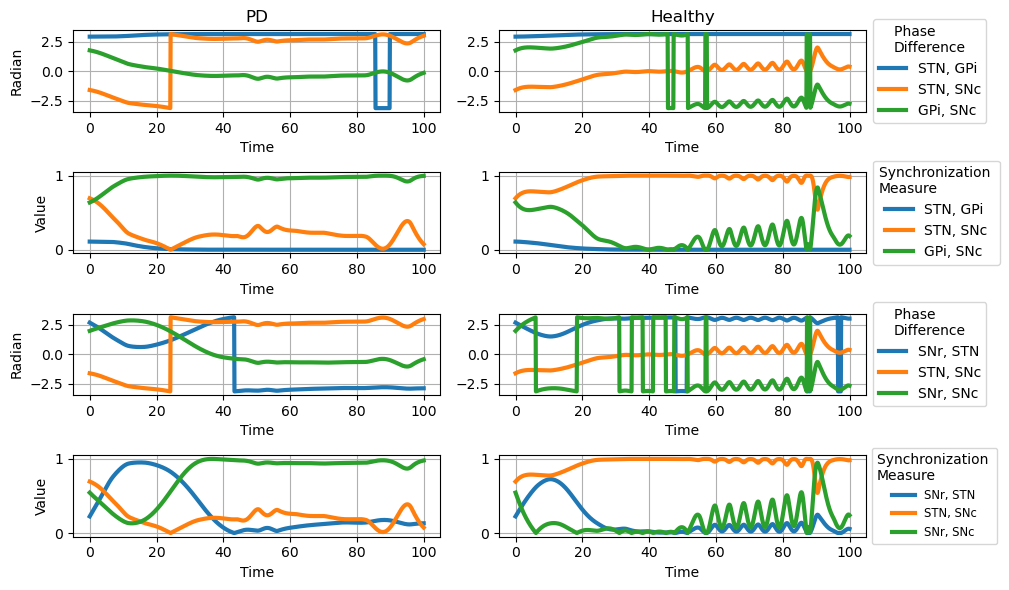

In [9]:
#theta0= array([1.13878832, 4.6177762 , 1.05511027, 6.27171308, 2.76710296,
#       0.35217278, 3.80883946, 1.16508376, 3.82968581, 5.30474866,
#       3.11110129, 4.21951334])



import matplotlib.pyplot as plt  

# Assuming m and n are defined for subplot layout  
m, n = 4, 2  # Example values, adjust as needed  
plt.figure(figsize=(12, 6))
plt.subplot(m, n, 1)
plt.plot(sol.t, delta_theta_65, label='STN, GPi',  linewidth=3)
plt.plot(sol.t, delta_theta_510, label='STN, SNc',  linewidth=3)
plt.plot(sol.t, delta_theta_610, label='GPi, SNc',  linewidth=3)
plt.xlabel('Time')
plt.ylabel('Radian')
plt.title('PD')
plt.grid()

plt.subplot(m, n, 3)
plt.plot(sol.t, R56, label='R56',  linewidth=3)
plt.plot(sol.t, R510, label='R510',  linewidth=3)
plt.plot(sol.t, R610, label='R610',  linewidth=3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()

plt.subplot(m, n, 5)
plt.plot(sol.t, delta_theta_45, label='delta_theta_45',  linewidth=3)
plt.plot(sol.t, delta_theta_510, label='delta_theta_510',  linewidth=3)
plt.plot(sol.t, delta_theta_410, label='delta_theta_410',  linewidth=3)
plt.xlabel('Time')
plt.ylabel('Radian')
plt.grid()

plt.subplot(m, n, 7)
plt.plot(sol.t, R45, label='R45',  linewidth=3)
plt.plot(sol.t, R510, label='R510',  linewidth=3)
plt.plot(sol.t, R410, label='R410',  linewidth=3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()


# Subplot 1  
ax = plt.subplot(m, n, 2)  
plt.plot(sol_h.t, delta_theta_65_h, label='STN, GPi',  linewidth=3)  
plt.plot(sol_h.t, delta_theta_510_h, label='STN, SNc',  linewidth=3)  
plt.plot(sol_h.t, delta_theta_610_h, label='GPi, SNc',  linewidth=3)  
plt.xlabel('Time')  
#plt.ylabel('Radians')  
plt.title('Healthy')  
ax.legend(title='Phase \nDifference', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Subplot 2  
plt.subplot(m, n, 4)  
plt.plot(sol_h.t, R56_h, label='STN, GPi',  linewidth=3)  
plt.plot(sol_h.t, R510_h, label='STN, SNc',  linewidth=3)  
plt.plot(sol_h.t, R610_h, label='GPi, SNc',  linewidth=3)  
plt.xlabel('Time')  
#plt.ylabel('Synchronization Measure')  
plt.legend(title='Synchronization \nMeasure', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Subplot 3  
plt.subplot(m, n, 6)  
plt.plot(sol_h.t, delta_theta_45_h, label='SNr, STN',  linewidth=3)  
plt.plot(sol_h.t, delta_theta_510_h, label='STN, SNc',  linewidth=3)  
plt.plot(sol_h.t, delta_theta_410_h, label='SNr, SNc',  linewidth=3)  
plt.xlabel('Time')  
#plt.ylabel('Radians')  
plt.legend(title='Phase \nDifference', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Subplot 4  
plt.subplot(m, n, 8)  
plt.plot(sol_h.t, R45_h, label='SNr, STN',  linewidth=3)  
plt.plot(sol_h.t, R510_h, label='STN, SNc',  linewidth=3)  
plt.plot(sol_h.t, R410_h, label='SNr, SNc',  linewidth=3)  
plt.xlabel('Time')  
#plt.ylabel('Value')  
plt.legend(title='Synchronization \nMeasure', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')  
plt.grid()

# Adjust layout to make room for the legends  
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin  

plt.savefig('results/UncontrolledDynamics.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

In [138]:
theta0

array([1.13878832, 4.6177762 , 1.05511027, 6.27171308, 2.76710296,
       0.35217278, 3.80883946, 1.16508376, 3.82968581, 5.30474866,
       3.11110129, 4.21951334])

In [ ]:
PD
5,6,10
synch;6,10

4,5,10
synch:4,10

array([1.4170685 , 0.96415461, 1.01966487, 2.2996879 , 5.10276309,
       4.57692904, 2.34508911, 1.45117673, 0.32640262, 0.1416818 ,
       4.77870059, 4.47308454])

array([4.88861022, 2.57488635, 3.13371352, 2.55466238, 0.18773784,
       0.55848403, 3.92862441, 6.27439603, 4.83476731, 3.79520463,
       0.59758104, 5.19274414])

array([2.97965144, 2.88041689, 5.31820391, 1.47234643, 3.47313868,
       0.78454326, 3.70524275, 2.65256775, 0.16683834, 3.66548892,
       5.46139337, 5.75232834])

array([1.13878832, 4.6177762 , 1.05511027, 6.27171308, 2.76710296,
       0.35217278, 3.80883946, 1.16508376, 3.82968581, 5.30474866,
       3.11110129, 4.21951334])


# Uncontrolled Synchronizations

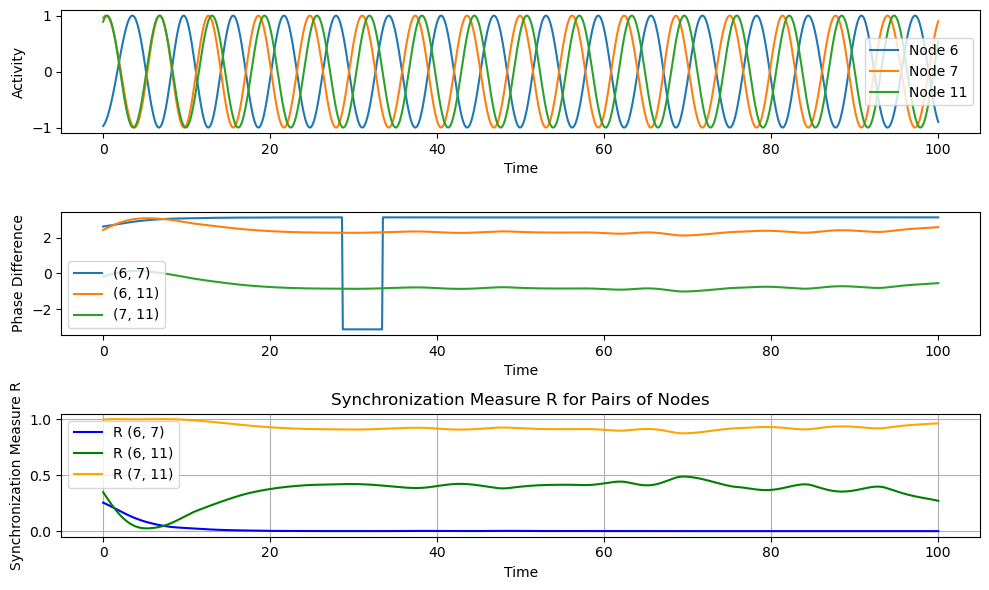

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

mat=d_pd
f=1

# Parameters
N = 12  # Number of oscillators
K = 1   # Coupling strength
omega = f * np.ones(N)  # Natural frequencies
final_time = 100  # Set final time to 100 units  
dt_int = 0.1      # Time step of 0.1  

# Initial random phases
# theta0 = np.random.uniform(0, 2 * np.pi, N)
theta0=np.array([5.93269096, 2.90465826, 1.74004032, 4.7045243 , 0.63320732,
       4.95122001, 1.29548901, 1.01956886, 5.37567239, 6.19875368,
       1.10043561, 0.84954932])

# Kuramoto dynamics  
def kuramoto(t, theta):  
    dtheta_dt = omega + (K / N) * np.sum(mat * np.sin(theta[:, np.newaxis] - theta), axis=1)  
    return dtheta_dt  

# Solve the system  
t_eval = np.arange(0, final_time + dt_int, dt_int)  # Create an array of time points from 0 to 100 with step 0.1  
sol = solve_ivp(kuramoto, [0, final_time], theta0, t_eval=t_eval, method='RK45')  

# Accessing the results  
theta_results = sol.y  # The angles at each time point  
time_points = sol.t    # The time points at which the solution was evaluated  

# Wrap phases to [-pi, pi] range
#for i in range(N):
#    sol.y[i] = np.mod(sol.y[i], 2 * np.pi) - np.pi

# Wrap phases to [-pi, pi]  
sol.y = (sol.y + np.pi) % (2 * np.pi) - np.pi  


# Access results  
theta_results = sol.y  # The angles at each time point  
time_points = sol.t    # The time points at which the solution was evaluated  
# Wrap phases to [-pi, pi]  
theta_results = (theta_results + np.pi) % (2 * np.pi) - np.pi  



# Extract node activity
node6_activity = np.sin(sol.y[5])
node7_activity = np.sin(sol.y[6])
node11_activity = np.sin(sol.y[10])

# Compute absolute phases
abs_phases = np.abs(sol.y)
# Compute phase differences
# delta_theta_67 = abs_phases[6] - abs_phases[5]
# delta_theta_611 = abs_phases[10] - abs_phases[5]
# delta_theta_711 = abs_phases[10] - abs_phases[6]
delta_theta_67 = sol.y[6] - sol.y[5]
delta_theta_611 = sol.y[10] - sol.y[5]
delta_theta_711 = sol.y[10] - sol.y[6]

#delta_theta_12 = abs_phases[1] - abs_phases[0]
#delta_theta_34 = abs_phases[3] - abs_phases[2]
#delta_theta_58 = abs_phases[7] - abs_phases[4]
#delta_theta_910 = abs_phases[9] - abs_phases[8]

delta_theta_67 = (delta_theta_67+ np.pi) % (2 * np.pi) - np.pi  
delta_theta_611 = (delta_theta_611+ np.pi) % (2 * np.pi) - np.pi  
delta_theta_711 = (delta_theta_711+ np.pi) % (2 * np.pi) - np.pi  


subplot_size=3
# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(subplot_size, 1, 1)
plt.plot(sol.t, node6_activity, label='Node 6')
plt.plot(sol.t, node7_activity, label='Node 7')
plt.plot(sol.t, node11_activity, label='Node 11')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.legend()

plt.subplot(subplot_size, 1, 2)
plt.plot(sol.t, delta_theta_67, label='(6, 7)')
plt.plot(sol.t, delta_theta_611, label='(6, 11)')
plt.plot(sol.t, delta_theta_711, label='(7, 11)')
plt.xlabel('Time')
plt.ylabel('Phase Difference')
plt.legend()

# Synchronization measure R for nodes 7 and 11
# R67 = np.abs(np.mean(np.exp(1j * sol.y[[5, 6], :]), axis=0))
# R611 = np.abs(np.mean(np.exp(1j * sol.y[[5, 10], :]), axis=0))
# R711 = np.abs(np.mean(np.exp(1j * sol.y[[6, 10], :]), axis=0))

# Calculate synchronization measure R for specific pairs  
def synchronization_measure(theta1, theta2):  
    return np.abs((np.exp(1j * (theta1))+np.exp(1j * (theta2)))/2)  

# Initialize R measures for specific pairs  
R_67 = np.zeros(len(time_points))  # For nodes 6 and 7  
R_611 = np.zeros(len(time_points))  # For nodes 6 and 11  
R_711 = np.zeros(len(time_points))  # For nodes 7 and 11  

# Calculate R for each time point  
for t in range(len(time_points)):  
    R_67[t] = synchronization_measure(theta_results[5, t], theta_results[6, t])  # Nodes 6 and 7  
    R_611[t] = synchronization_measure(theta_results[5, t], theta_results[10, t])  # Nodes 6 and 11  
    R_711[t] = synchronization_measure(theta_results[6, t], theta_results[10, t])  # Nodes 7 and 11  

# Plot results  
#plt.figure(figsize=(5, 3))  
plt.subplot(subplot_size, 1, 3)
# Plot synchronization measures  
plt.plot(sol.t, R_67, label='R (6, 7)', color='blue')  
plt.plot(sol.t, R_611, label='R (6, 11)', color='green')  
plt.plot(sol.t, R_711, label='R (7, 11)', color='orange')  
plt.xlabel('Time')  
plt.ylabel('Synchronization Measure R')  
plt.title('Synchronization Measure R for Pairs of Nodes')  
plt.legend()  
plt.grid(True)  

plt.tight_layout()

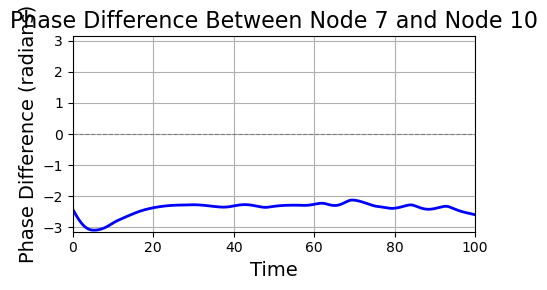

In [4]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import solve_ivp  

omega = 1 * np.ones(N)  # Natural frequencies

# Define the Kuramoto model  
def kuramoto(t, theta, K, omega, N):  
    dtheta_dt = omega + (K / N) * np.sum(mat * np.sin(theta[:, np.newaxis] - theta), axis=1)  
    return dtheta_dt  

# Set initial conditions and time span  
theta0 = np.array([5.93269096, 2.90465826, 1.74004032, 4.7045243 , 0.63320732,
       4.95122001, 1.29548901, 1.01956886, 5.37567239, 6.19875368,
       1.10043561, 0.84954932])  

t_span = (0, 100)  # Time interval  
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # Evaluation points  

# Solve using solve_ivp  
sol = solve_ivp(kuramoto, t_span, theta0, args=(K, omega, N), t_eval=t_eval)  

# Extract the solution for phases  
theta = sol.y  

# Calculate the phase difference between node 7 and node 10  
node_7 = theta[5]  # Node 7 (index 6)  
node_10 = theta[10]  # Node 10 (index 9)  
phase_difference = node_7 - node_10  

# Normalize the phase difference to the range [-pi, pi]  
phase_difference = (phase_difference + np.pi) % (2 * np.pi) - np.pi  

# Plot the phase difference  
plt.figure(figsize=(5, 3))  
plt.plot(t_eval, phase_difference, color='blue', linewidth=2)  
plt.title('Phase Difference Between Node 7 and Node 10', fontsize=16)  
plt.xlabel('Time', fontsize=14)  
plt.ylabel('Phase Difference (radians)', fontsize=14)  
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')  # Add a horizontal line at zero  
plt.xlim(t_span)  # Set x-axis limits  
plt.ylim(-np.pi, np.pi)  # Set y-axis limits  
plt.grid()  
plt.tight_layout()  # Adjust the layout  
# plt.savefig('phase_difference_nodes_7_10.pdf', dpi=300)  # Save plot as PDF for publication  
plt.show()

In [ ]:
try different initial theta for the purposee of synhch and desycnh nodes 5,6,7,11

# odeint

In [3]:
import numpy as np

theta0= np.array([2.97965144, 2.88041689, 5.31820391, 1.47234643, 3.47313868,
       0.78454326, 3.70524275, 2.65256775, 0.16683834, 3.66548892,
       5.46139337, 5.75232834])

# np.array([1.13878832, 4.6177762 , 1.05511027, 6.27171308, 2.76710296,
#        0.35217278, 3.80883946, 1.16508376, 3.82968581, 5.30474866,
#        3.11110129, 4.21951334])

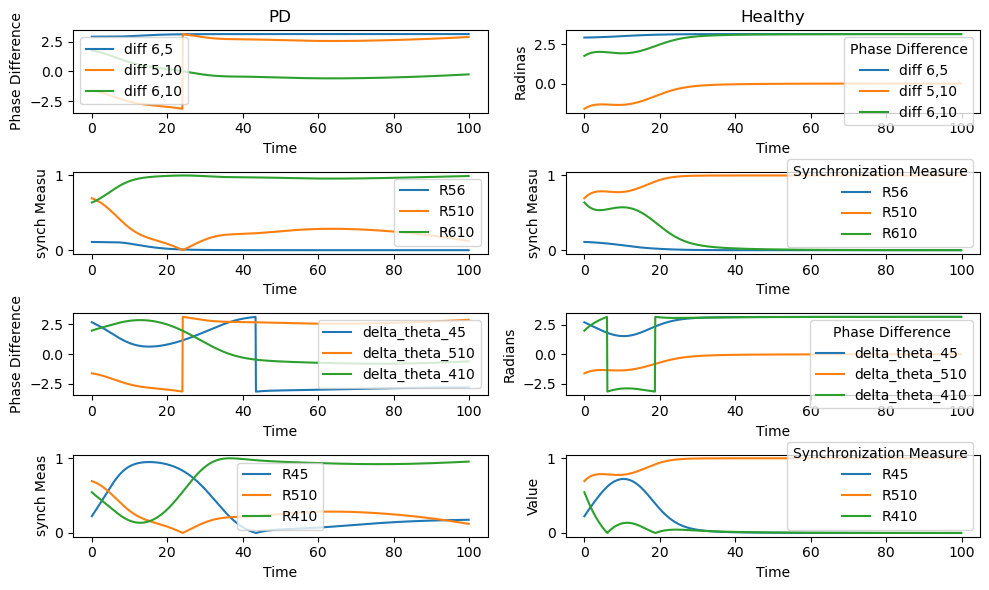

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

mat_h= d_h
mat_pd= d_pd
# Parameters
final_time= 100
N = 12  # Number of oscillators
K = 1   # Coupling strength
f= 20
omega = f * np.ones(N)  # Natural frequencies
dt_int = 0.1      # Time step of 0.1  
# Time array for integration  
t = np.arange(0, final_time, dt_int)  
samples=1000
# Initial random phases
#theta0 = np.random.uniform(0, 2 * np.pi, N)

# Define the Kuramoto model for odeint  
def kuramoto_ode(theta, t, N, K, omega):  
    dtheta_dt = np.zeros(N)  
    for i in range(N):  
        dtheta_dt[i] = omega[i] + (K / N) * np.sum(mat_pd[i] * np.sin(theta - theta[i]))  
    return dtheta_dt
# Define the Kuramoto model for odeint  
def kuramoto_ode_h(theta, t, N, K, omega):  
    dtheta_dt = np.zeros(N)  
    for i in range(N):  
        dtheta_dt[i] = omega[i] + (K / N) * np.sum(mat_h[i] * np.sin(theta - theta[i]))  
    return dtheta_dt
    
result_solve_ivp_h=[]
result_solve_ivp_pd=[]


# Solve using odeint  
result_solve_ivp_h = odeint(kuramoto_ode_h, theta0, t, args=(N, K, omega))  
sol_h= result_solve_ivp_h
result_solve_ivp_pd =  odeint(kuramoto_ode, theta0, t, args=(N, K, omega)) 
sol= result_solve_ivp_pd

# Wrap phases to [-pi, pi] range
for i in range(N):
    sol_h[i] = np.mod(sol_h[i], 2 * np.pi) - np.pi
# Wrap phases to [-pi, pi] range
for i in range(N):
    sol[i] = np.mod(sol[i], 2 * np.pi) - np.pi

def wrap_phase(phase):
    wrapped = (phase+ np.pi) % (2 * np.pi) - np.pi
    return wrapped
##############################################################   PD ####################
# Compute phase differences 5,6,10
delta_theta_65 = sol[:,6] - sol[:,5]
delta_theta_510 = sol[:,10] - sol[:,5]
delta_theta_610 = sol[:,10] - sol[:,6]
# Compute phase differences 4,5,10
delta_theta_45 = sol[:,4] - sol[:,5]
delta_theta_510 = sol[:,10] - sol[:,5]
delta_theta_410 = sol[:,10] - sol[:,4]

# Compute phase differences 5,6,10
delta_theta_65 = wrap_phase(delta_theta_65)
delta_theta_510 = wrap_phase(delta_theta_510)
delta_theta_610 = wrap_phase(delta_theta_610)
# Compute phase differences 4,5,10
delta_theta_45 = wrap_phase(delta_theta_45)
delta_theta_510 = wrap_phase(delta_theta_510)
delta_theta_410 = wrap_phase(delta_theta_410)
    
# Synchronization measure R : 5,6,10
R56 = np.abs(np.mean(np.exp(1j * sol[:,[5,6]]), axis=1))
R510 = np.abs(np.mean(np.exp(1j * sol[:,[5, 10]]), axis=1))
R610 = np.abs(np.mean(np.exp(1j * sol[:,[6, 10]]), axis=1))
# Synchronization measure R : 4,5,10
R45 = np.abs(np.mean(np.exp(1j * sol[:,[4, 5]]), axis=1))
R410 = np.abs(np.mean(np.exp(1j * sol[:,[4, 10]]), axis=1))
R510 = np.abs(np.mean(np.exp(1j * sol[:,[5, 10]]), axis=1))

###################################################################### Healthy  #############
# Compute phase differences 5,6,10
delta_theta_65_h = sol_h[:,6] - sol_h[:,5]
delta_theta_510_h = sol_h[:,10] - sol_h[:,5]
delta_theta_610_h = sol_h[:,10] - sol_h[:,6]
# Compute phase differences 4,5,10
delta_theta_45_h = sol_h[:,4] - sol_h[:,5]
delta_theta_510_h = sol_h[:,10] - sol_h[:,5]
delta_theta_410_h = sol_h[:,10] - sol_h[:,4]

# Compute phase differences 5,6,10
delta_theta_65_h = wrap_phase(delta_theta_65_h)
delta_theta_510_h = wrap_phase(delta_theta_510_h)
delta_theta_610_h = wrap_phase(delta_theta_610_h)
# Compute phase differences 4,5,10
delta_theta_45_h = wrap_phase(delta_theta_45_h)
delta_theta_510_h = wrap_phase(delta_theta_510_h)
delta_theta_410_h = wrap_phase(delta_theta_410_h)
    
# Synchronization measure R : 5,6,10
R56_h = np.abs(np.mean(np.exp(1j * sol_h[:,[5, 6]]), axis=1))
R510_h = np.abs(np.mean(np.exp(1j * sol_h[:,[5, 10]]), axis=1))
R610_h = np.abs(np.mean(np.exp(1j * sol_h[:,[6, 10]]), axis=1))
# Synchronization measure R : 4,5,10
R45_h = np.abs(np.mean(np.exp(1j * sol_h[:,[4, 5]]), axis=1))
R410_h = np.abs(np.mean(np.exp(1j * sol_h[:,[4, 10]]), axis=1))
R510_h = np.abs(np.mean(np.exp(1j * sol_h[:,[5, 10]]), axis=1))

 

m=4
n=2
# Plot results
#######################################    PD ##########################
plt.figure(figsize=(10, 6))
plt.subplot(m, n, 1)
plt.plot(t, delta_theta_65, label='diff 6,5')
plt.plot(t, delta_theta_510, label='diff 5,10')
plt.plot(t, delta_theta_610, label='diff 6,10')
plt.xlabel('Time')
plt.ylabel('Phase Difference')
plt.title('PD')
plt.legend()

plt.subplot(m, n, 3)
plt.plot(t, R56, label='R56')
plt.plot(t, R510, label='R510')
plt.plot(t, R610, label='R610')
plt.xlabel('Time')
plt.ylabel('synch Measu')
plt.legend()

plt.subplot(m, n, 5)
plt.plot(t, delta_theta_45, label='delta_theta_45')
plt.plot(t, delta_theta_510, label='delta_theta_510')
plt.plot(t, delta_theta_410, label='delta_theta_410')
plt.xlabel('Time')
plt.ylabel('Phase Difference')
plt.legend()

plt.subplot(m, n, 7)
plt.plot(t, R45, label='R45')
plt.plot(t, R510, label='R510')
plt.plot(t, R410, label='R410')
plt.xlabel('Time')
plt.ylabel('synch Meas')
plt.legend()
############################################################################

########################################### Healthy #################################
ax= plt.subplot(m, n, 2)
plt.plot(t, delta_theta_65_h, label='diff 6,5')
plt.plot(t, delta_theta_510_h, label='diff 5,10')
plt.plot(t, delta_theta_610_h, label='diff 6,10')
plt.xlabel('Time')
plt.ylabel('Radinas')
plt.title('Healthy')
ax.legend(title='Phase Difference')

plt.subplot(m, n, 4)
plt.plot(t, R56_h, label='R56')
plt.plot(t, R510_h, label='R510')
plt.plot(t, R610_h, label='R610')
plt.xlabel('Time')
plt.ylabel('synch Measu')
plt.legend(title='Synchronization Measure')

plt.subplot(m, n, 6)
plt.plot(t, delta_theta_45_h, label='delta_theta_45')
plt.plot(t, delta_theta_510_h, label='delta_theta_510')
plt.plot(t, delta_theta_410_h, label='delta_theta_410')
plt.xlabel('Time')
plt.ylabel('Radians')
plt.legend(title='Phase Difference')

plt.subplot(m, n, 8)
plt.plot(t, R45_h, label='R45')
plt.plot(t, R510_h, label='R510')
plt.plot(t, R410_h, label='R410')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(title='Synchronization Measure')

plt.tight_layout()
plt.show()


In [17]:
# Set global font properties  
plt.rc('font', size=15, weight='bold')  # Set default font size and weight  
plt.rc('axes', titlesize=15, labelsize=15, titleweight='bold')  # Set title and label sizes with bold weight  
plt.rc('xtick', labelsize=15)  # Set x-tick label size and weight  
plt.rc('ytick', labelsize=15)  # Set y-tick label size and weight  
plt.rc('legend', fontsize=15)  # Set legend font size and title weight  

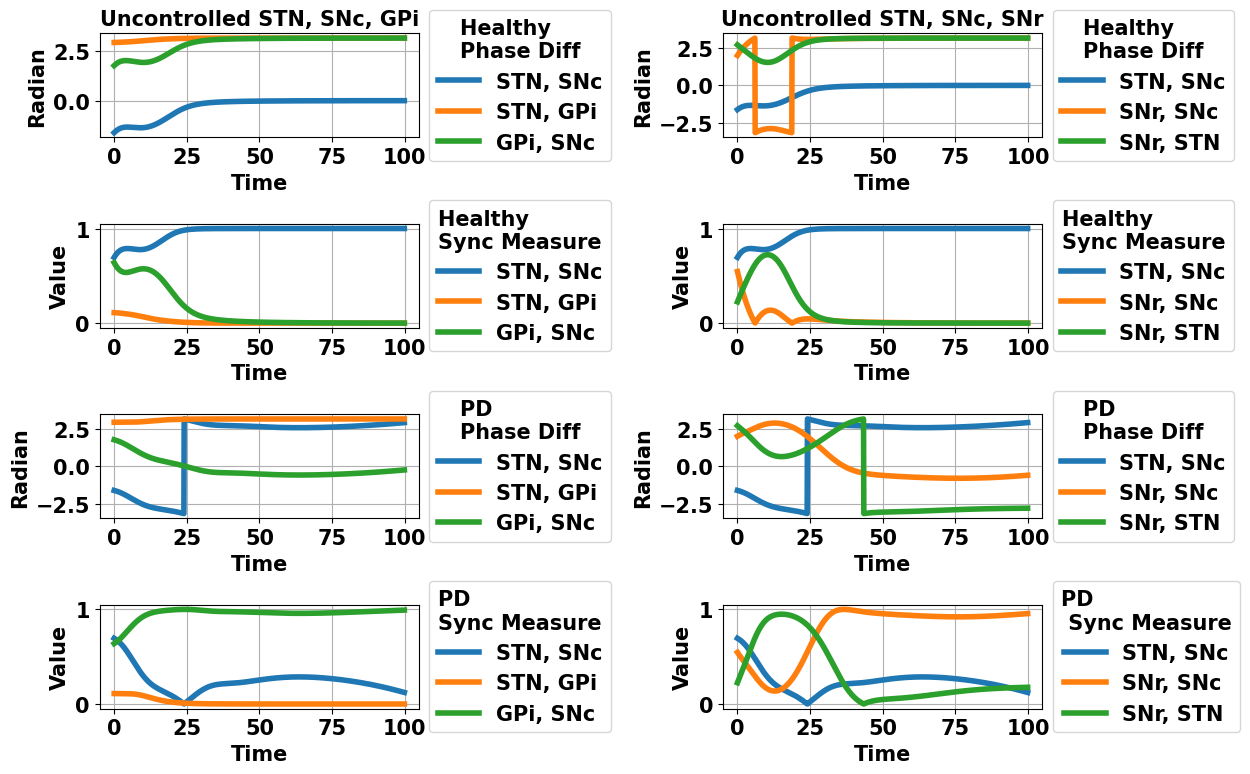

In [18]:
#theta0= array([1.13878832, 4.6177762 , 1.05511027, 6.27171308, 2.76710296,
#       0.35217278, 3.80883946, 1.16508376, 3.82968581, 5.30474866,
#       3.11110129, 4.21951334])

import matplotlib.pyplot as plt  

a=4

# Assuming m and n are defined for subplot layout  
m, n = 4, 2  # Example values, adjust as needed  
plt.figure(figsize=(15, 8))
plt.subplot(m, n, 5)
plt.plot(t, delta_theta_510, label='STN, SNc',  linewidth=a)
plt.plot(t, delta_theta_65, label='STN, GPi',  linewidth=a)
plt.plot(t, delta_theta_610, label='GPi, SNc',  linewidth=a)
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Radian',fontweight='bold')
#plt.title('PD')
plt.legend(title='PD \nPhase Diff', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

plt.subplot(m, n, 7)
plt.plot(t, R510,label='STN, SNc',  linewidth=a)
plt.plot(t, R56,label='STN, GPi',  linewidth=a)
plt.plot(t, R610, label='GPi, SNc',  linewidth=a)
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Value',fontweight='bold')
#plt.title('PD')
plt.legend(title='PD \nSync Measure', loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()



plt.subplot(m, n, 6)
plt.plot(t, delta_theta_510, label='STN, SNc',  linewidth=a)
plt.plot(t, delta_theta_410, label='SNr, SNc',  linewidth=a)
plt.plot(t, delta_theta_45, label='SNr, STN',  linewidth=a)
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Radian',fontweight='bold')
#plt.title('PD')
plt.legend(title='PD \nPhase Diff', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

plt.subplot(m, n, 8)
plt.plot(t, R510, label='STN, SNc',  linewidth=a)
plt.plot(t, R410, label='SNr, SNc',  linewidth=a)
plt.plot(t, R45, label='SNr, STN',  linewidth=a)
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Value',fontweight='bold')
#plt.title('PD')
plt.legend(title='PD \n Sync Measure', loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()


# Subplot 1  
plt.subplot(m, n, 1)  
plt.plot(t, delta_theta_510_h, label='STN, SNc',  linewidth=a)
plt.plot(t, delta_theta_65_h, label='STN, GPi',  linewidth=a)  
plt.plot(t, delta_theta_610_h, label='GPi, SNc',  linewidth=a)  
plt.xlabel('Time',fontweight='bold')  
plt.ylabel('Radian',fontweight='bold')  
plt.title('Uncontrolled STN, SNc, GPi')
plt.legend(title='Healthy \nPhase Diff', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Subplot 2  
plt.subplot(m, n, 3)  
plt.plot(t, R510_h, label='STN, SNc',  linewidth=a)
plt.plot(t, R56_h, label='STN, GPi',  linewidth=a)  
plt.plot(t, R610_h, label='GPi, SNc',  linewidth=a)  
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Value',fontweight='bold')
#plt.title('Healthy')  
#plt.ylabel('Synchronization Measure')  
plt.legend(title='Healthy \nSync Measure', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()


# Subplot 3  
plt.subplot(m, n, 2)  
plt.plot(t, delta_theta_510_h, label='STN, SNc',  linewidth=a)  
plt.plot(t, delta_theta_410_h, label='SNr, SNc',  linewidth=a)
plt.plot(t, delta_theta_45_h, label='SNr, STN',  linewidth=a)  
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Radian',fontweight='bold')
plt.title('Uncontrolled STN, SNc, SNr')  
plt.legend(title='Healthy \nPhase Diff', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Subplot 4  
plt.subplot(m, n, 4)  
plt.plot(t, R510_h, label='STN, SNc',  linewidth=a) 
plt.plot(t, R410_h, label='SNr, SNc',  linewidth=a)  
plt.plot(t, R45_h, label='SNr, STN',  linewidth=a)  
plt.xlabel('Time',fontweight='bold')  
#plt.title('Healthy') 
plt.ylabel('Value',fontweight='bold')
plt.legend(title='Healthy \nSync Measure', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Adjust layout to make room for the legends  
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin  

plt.savefig('results/UncontrolledDynamics.png',bbox_inches='tight', transparent=True)

plt.show()

In [10]:
# Set global font properties 
b=8
plt.rc('font', size=b, weight='bold')  # Set default font size and weight  
plt.rc('axes', titlesize=b, labelsize=b, titleweight='bold')  # Set title and label sizes with bold weight  
plt.rc('xtick', labelsize=b)  # Set x-tick label size and weight  
plt.rc('ytick', labelsize=b)  # Set y-tick label size and weight  
plt.rc('legend', fontsize=b)  # Set legend font size and title weight  

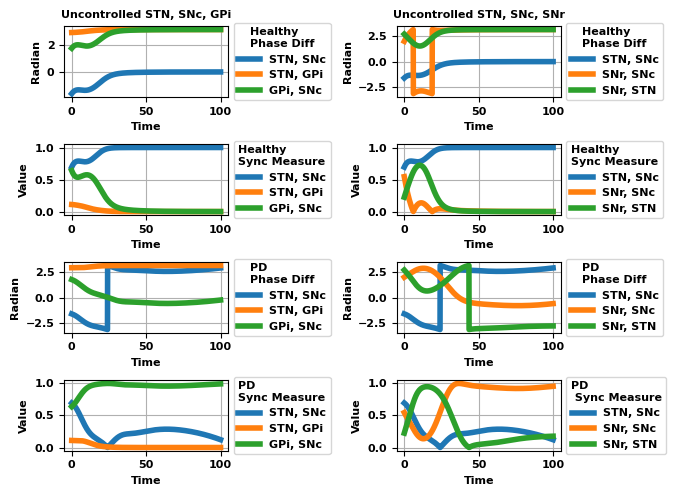

In [16]:
#theta0= array([1.13878832, 4.6177762 , 1.05511027, 6.27171308, 2.76710296,
#       0.35217278, 3.80883946, 1.16508376, 3.82968581, 5.30474866,
#       3.11110129, 4.21951334])

import matplotlib.pyplot as plt  

a=4

# Assuming m and n are defined for subplot layout  
m, n = 4, 2  # Example values, adjust as needed  
plt.figure(figsize=(8, 5))
plt.subplot(m, n, 5)
plt.plot(t, delta_theta_510, label='STN, SNc',  linewidth=a)
plt.plot(t, delta_theta_65, label='STN, GPi',  linewidth=a)
plt.plot(t, delta_theta_610, label='GPi, SNc',  linewidth=a)
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Radian',fontweight='bold')
#plt.title('PD')
plt.legend(title='PD \nPhase Diff', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

plt.subplot(m, n, 7)
plt.plot(t, R510,label='STN, SNc',  linewidth=a)
plt.plot(t, R56,label='STN, GPi',  linewidth=a)
plt.plot(t, R610, label='GPi, SNc',  linewidth=a)
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Value',fontweight='bold')
#plt.title('PD')
plt.legend(title='PD \nSync Measure', loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()



plt.subplot(m, n, 6)
plt.plot(t, delta_theta_510, label='STN, SNc',  linewidth=a)
plt.plot(t, delta_theta_410, label='SNr, SNc',  linewidth=a)
plt.plot(t, delta_theta_45, label='SNr, STN',  linewidth=a)
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Radian',fontweight='bold')
#plt.title('PD')
plt.legend(title='PD \nPhase Diff', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

plt.subplot(m, n, 8)
plt.plot(t, R510, label='STN, SNc',  linewidth=a)
plt.plot(t, R410, label='SNr, SNc',  linewidth=a)
plt.plot(t, R45, label='SNr, STN',  linewidth=a)
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Value',fontweight='bold')
#plt.title('PD')
plt.legend(title='PD \n Sync Measure', loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.grid()


# Subplot 1  
plt.subplot(m, n, 1)  
plt.plot(t, delta_theta_510_h, label='STN, SNc',  linewidth=a)
plt.plot(t, delta_theta_65_h, label='STN, GPi',  linewidth=a)  
plt.plot(t, delta_theta_610_h, label='GPi, SNc',  linewidth=a)  
plt.xlabel('Time',fontweight='bold')  
plt.ylabel('Radian',fontweight='bold')  
plt.title('Uncontrolled STN, SNc, GPi')
plt.legend(title='Healthy \nPhase Diff', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Subplot 2  
plt.subplot(m, n, 3)  
plt.plot(t, R510_h, label='STN, SNc',  linewidth=a)
plt.plot(t, R56_h, label='STN, GPi',  linewidth=a)  
plt.plot(t, R610_h, label='GPi, SNc',  linewidth=a)  
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Value',fontweight='bold')
#plt.title('Healthy')  
#plt.ylabel('Synchronization Measure')  
plt.legend(title='Healthy \nSync Measure', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()


# Subplot 3  
plt.subplot(m, n, 2)  
plt.plot(t, delta_theta_510_h, label='STN, SNc',  linewidth=a)  
plt.plot(t, delta_theta_410_h, label='SNr, SNc',  linewidth=a)
plt.plot(t, delta_theta_45_h, label='SNr, STN',  linewidth=a)  
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Radian',fontweight='bold')
plt.title('Uncontrolled STN, SNc, SNr')  
plt.legend(title='Healthy \nPhase Diff', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Subplot 4  
plt.subplot(m, n, 4)  
plt.plot(t, R510_h, label='STN, SNc',  linewidth=a) 
plt.plot(t, R410_h, label='SNr, SNc',  linewidth=a)  
plt.plot(t, R45_h, label='SNr, STN',  linewidth=a)  
plt.xlabel('Time',fontweight='bold')  
#plt.title('Healthy') 
plt.ylabel('Value',fontweight='bold')
plt.legend(title='Healthy \nSync Measure', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Adjust layout to make room for the legends  
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin  

plt.savefig('results/UncontrolledDynamics.png',bbox_inches='tight', transparent=True)

plt.show()

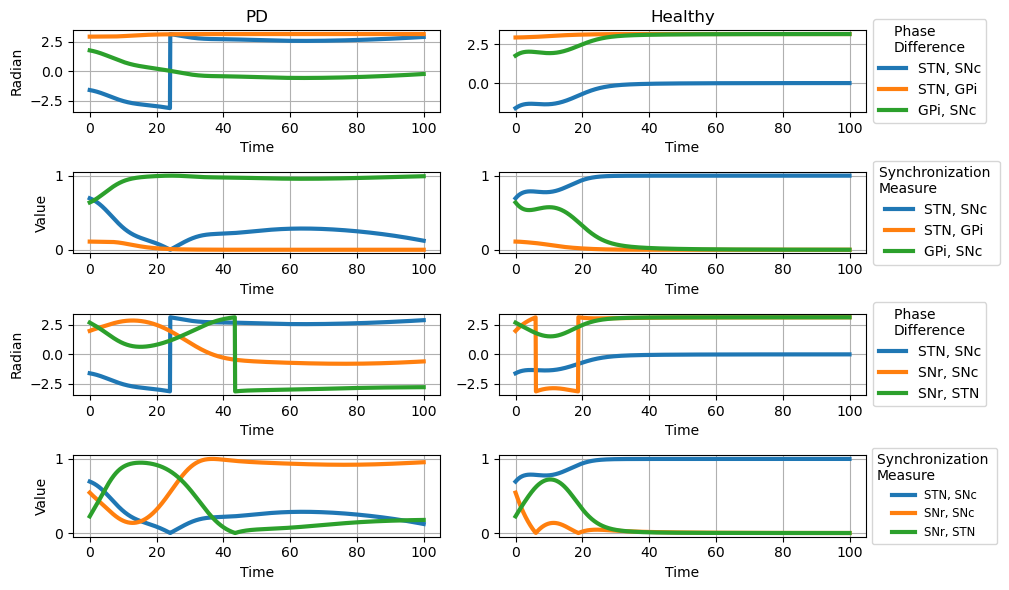

In [8]:
#theta0= array([1.13878832, 4.6177762 , 1.05511027, 6.27171308, 2.76710296,
#       0.35217278, 3.80883946, 1.16508376, 3.82968581, 5.30474866,
#       3.11110129, 4.21951334])



import matplotlib.pyplot as plt  

# Assuming m and n are defined for subplot layout  
m, n = 4, 2  # Example values, adjust as needed  
plt.figure(figsize=(12, 6))
plt.subplot(m, n, 1)
plt.plot(t, delta_theta_510, label='STN, SNc',  linewidth=3)
plt.plot(t, delta_theta_65, label='STN, GPi',  linewidth=3)
plt.plot(t, delta_theta_610, label='GPi, SNc',  linewidth=3)
plt.xlabel('Time')
plt.ylabel('Radian')
plt.title('PD')
plt.grid()

plt.subplot(m, n, 3)
plt.plot(t, R510, label='R510',  linewidth=3)
plt.plot(t, R56, label='R56',  linewidth=3)
plt.plot(t, R610, label='R610',  linewidth=3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()

plt.subplot(m, n, 5)
plt.plot(t, delta_theta_510, label='delta_theta_510',  linewidth=3)
plt.plot(t, delta_theta_410, label='delta_theta_410',  linewidth=3)
plt.plot(t, delta_theta_45, label='delta_theta_45',  linewidth=3)
plt.xlabel('Time')
plt.ylabel('Radian')
plt.grid()

plt.subplot(m, n, 7)
plt.plot(t, R510, label='R510',  linewidth=3)
plt.plot(t, R410, label='R410',  linewidth=3)
plt.plot(t, R45, label='R45',  linewidth=3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()


# Subplot 1  
ax = plt.subplot(m, n, 2)  
plt.plot(t, delta_theta_510_h, label='STN, SNc',  linewidth=3)
plt.plot(t, delta_theta_65_h, label='STN, GPi',  linewidth=3)  
plt.plot(t, delta_theta_610_h, label='GPi, SNc',  linewidth=3)  
plt.xlabel('Time')  
#plt.ylabel('Radians')  
plt.title('Healthy')  
ax.legend(title='Phase \nDifference', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Subplot 2  
plt.subplot(m, n, 4)  
plt.plot(t, R510_h, label='STN, SNc',  linewidth=3)
plt.plot(t, R56_h, label='STN, GPi',  linewidth=3)  
plt.plot(t, R610_h, label='GPi, SNc',  linewidth=3)  
plt.xlabel('Time')  
#plt.ylabel('Synchronization Measure')  
plt.legend(title='Synchronization \nMeasure', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Subplot 3  
plt.subplot(m, n, 6)  
plt.plot(t, delta_theta_510_h, label='STN, SNc',  linewidth=3)  
plt.plot(t, delta_theta_410_h, label='SNr, SNc',  linewidth=3)
plt.plot(t, delta_theta_45_h, label='SNr, STN',  linewidth=3)  
plt.xlabel('Time')  
#plt.ylabel('Radians')  
plt.legend(title='Phase \nDifference', loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid()

# Subplot 4  
plt.subplot(m, n, 8)  
plt.plot(t, R510_h, label='STN, SNc',  linewidth=3) 
plt.plot(t, R410_h, label='SNr, SNc',  linewidth=3)  
plt.plot(t, R45_h, label='SNr, STN',  linewidth=3)  
plt.xlabel('Time')  
#plt.ylabel('Value')  
plt.legend(title='Synchronization \nMeasure', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')  
plt.grid()

# Adjust layout to make room for the legends  
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin  

plt.savefig('results/UncontrolledDynamics.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()